In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from functions import *

In [15]:
#Generating the data
D = 1000 # number of documents to generate for the database; they will be sentences in this example
M = 300 # number of iterations to repeat the recursions
L = 1 # number of epochs to perform by repeating training over data

# 4 topics
T = 4
weather = np.array(['rain','weather','cold','hot','sunny','snow','cloudy','humid','temperature','storm','tornado','wind','moon','spring','winter','summer'])
universe= np.array(['universe','planet','star','sun','moon','earth','comet','black hole','galaxy','orbit','gravity','physics','geometry','atmosphere','dark matter'])
sports  = np.array(['sport','player','ball','stadium','score','coach','training','soccer','basketball','running','bus','win','loss','tournament','match','competition'])
education = np.array(['student','learning','teacher','book','lecture','school','college','ball','blackboard','desk','lunch','course','principal','lab','exam','test','geometry','physics','class','bus'])

weather = np.sort(weather) # sorting alphabetically
universe = np.sort(universe)
sports = np.sort(sports)
education = np.sort(education)

# Dictionary of keywords and respective BETA vectors under each topic
dictionary = np.array(['rain','weather','cold','hot','sunny','snow','cloudy','humid','temperature','storm','tornado','wind', \
    'moon','spring','winter','summer','universe','planet','star','sun','earth','comet','black hole','galaxy','orbit','gravity', \
    'physics','geometry','atmosphere','dark matter','sport','player','ball','stadium','score','coach','training','soccer', \
    'basketball','running','bus','test','win','loss','tournament','match','competition','student', \
    'learning','teacher','book','lecture','school','college','blackboard','desk','lab', 'lunch','course','principal', \
    'exam','class'])

dictionary = np.sort(dictionary)
W = max(dictionary.shape)

beta_weather = np.zeros(W)
beta_universe = np.zeros(W)
beta_sports = np.zeros(W)
beta_education = np.zeros(W)

N_weather = max(weather.shape)
N_universe = max(universe.shape)
N_sports = max(sports.shape)
N_education = max(education.shape)

for w in range(W): # setting the beta's uniformly across each topic
    word = dictionary[w]
    for wprime in range(N_weather):
        wx = weather[wprime]
        if word == wx:
            beta_weather[w] = 1/N_weather # we are assuming the words in category weather are equally probable 
    for wprime in range(N_sports):
        wx = sports[wprime]
        if word == wx:
            beta_sports[w] = 1/N_sports # we are assuming the words in category sports are equally probable 
    for wprime in range(N_education):
        wx = education[wprime]
        if word == wx:
            beta_education[w] = 1/N_education # we are assuming the words in category education are equally probable 
    for wprime in range(N_universe):
        wx = universe[wprime]
        if word == wx:
            beta_universe[w] = 1/N_universe # we are assuming the words in category universe are equally probable 

y = np.concatenate([np.array([beta_weather[w], beta_universe[w], beta_sports[w], beta_education[w]]).reshape(1, -1) / np.array([beta_weather[w], beta_universe[w], beta_sports[w], beta_education[w]]).sum() for w in range(W)], axis=0)

# generation of database
Nd_vec = np.zeros(D) # size of each document
database = D*[None] # database of documents

Nd_max = 8 # maximum number of keywords in a document
Nd_min = 3 # minimum number of keywords in a document
alpha_org = np.random.rand(T) + 0.0001 # alpha used to generate the theta's in the database

count_of_words = np.zeros(W) # counter: counts number of times a word is repeated
total_words = 0 # total number of words in database
count_of_words_in_topics = np.zeros(T) # counts number of words in each topic in database

Theta_org = np.zeros((T, D))
ZN = D*[None] # saves the topics for the words in each document

for d in range(D):
    words_d = []
    theta_d = dirichlet(alpha_org)
    Theta_org[:, d] = theta_d # saves theta_d
    Nd = np.random.randint(1, Nd_max-2) + Nd_min
    zn_vec = np.zeros(Nd)
    for n in range(Nd): # generate words in document
        zn = categorical_variable(theta_d)
        if zn == 1:
            beta_org = beta_weather
            count_of_words_in_topics[0] += 1
        elif zn == 2:
            beta_org = beta_universe
            count_of_words_in_topics[1] += 1
        elif zn == 3:
            beta_org = beta_sports
            count_of_words_in_topics[2] += 1
        elif zn == 4:
            beta_org = beta_education
            count_of_words_in_topics[3] +=1
        zn_vec[n] = zn
        index_of_word = categorical_variable(beta_org)
        words_d.append(dictionary[index_of_word-1])
        count_of_words[index_of_word-1] += 1
        total_words += 1
    database[d] = words_d
    Nd_vec[d] = Nd
    ZN[d] = zn_vec

print("Total words in all D documents in database: ", total_words)
count_of_words_norm = count_of_words/total_words # percentage measure

count_of_words_in_topics_relative = count_of_words_in_topics/total_words

Total words in all D documents in database:  6020


[]

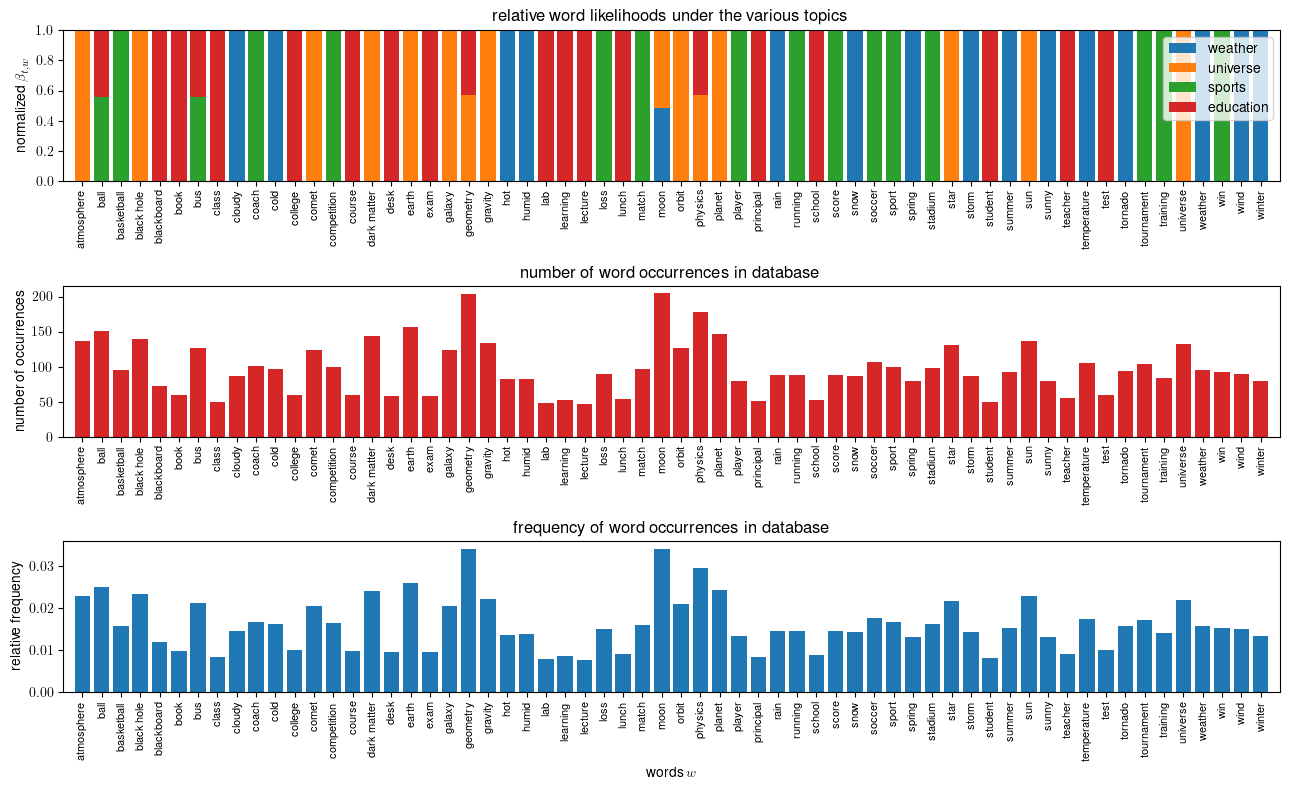

In [22]:
# figure 7

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=13, 8
fig = plt.figure()

ax = fig.add_subplot(311)
x = np.arange(W)
y1 = y[:, 0]
y2 = y[:, 1]
y3 = y[:, 2]
y4 = y[:, 3]

ax.bar(x, y1, label="weather")
ax.bar(x, y2, bottom=y1, label="universe")
ax.bar(x, y3, bottom=y1+y2, label="sports")
ax.bar(x, y4, bottom=y1+y2+y3, label="education")
plt.legend(loc='upper right')
ax.set_xlim(-1, W)
ax.set_xticks(x)
ax.set_title("relative word likelihoods under the various topics")
ax.set_ylabel("normalized $\\beta_{t, w}$")
ax.set_xticklabels(dictionary.tolist(), rotation='vertical', fontsize=8)

ax = fig.add_subplot(312)
x = np.arange(W)
y1 = y[:, 0]
y2 = y[:, 1]
y3 = y[:, 2]
y4 = y[:, 3]

ax.bar(x, count_of_words, color="tab:red")
ax.set_xlim(-1, W)
ax.set_xticks(x)
ax.set_xticklabels(dictionary.tolist(), rotation='vertical', fontsize=8)
ax.set_title("number of word occurrences in database")
ax.set_ylabel("number of occurrences")

ax = fig.add_subplot(313)
x = np.arange(W)
y1 = y[:, 0]
y2 = y[:, 1]
y3 = y[:, 2]
y4 = y[:, 3]

ax.bar(x, count_of_words_norm)
ax.set_xlim(-1, W)
ax.set_xticks(x)
ax.set_xticklabels(dictionary.tolist(), rotation='vertical', fontsize=8)
ax.set_title("frequency of word occurrences in database")
ax.set_ylabel("relative frequency")
ax.set_xlabel("words $w$")

fig.tight_layout()

plt.plot()

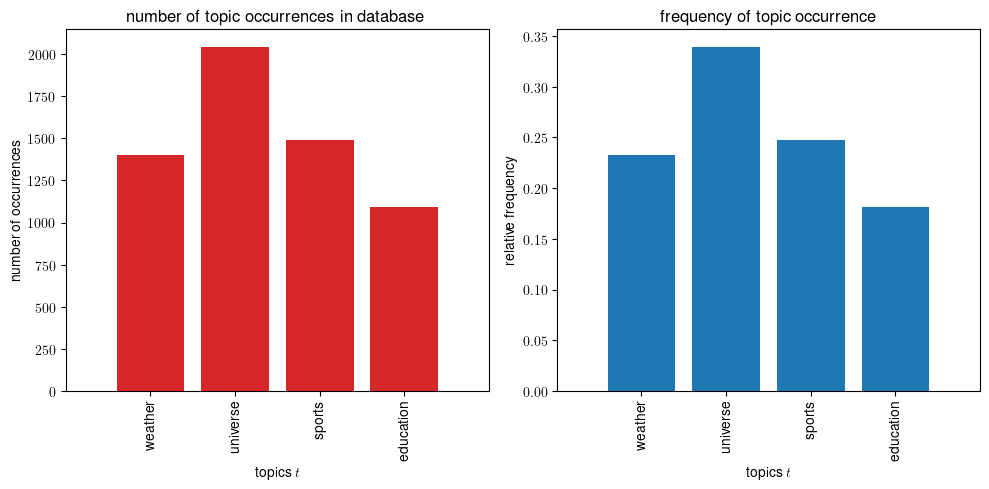

In [23]:
# figure 8

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.rcParams['figure.figsize']=10, 5
fig = plt.figure()

ax = fig.add_subplot(121)

ax.bar(np.arange(T), count_of_words_in_topics, color="tab:red")
ax.set_xlim(-1, T)
ax.set_xticks(np.arange(T))
ax.set_xticklabels(["weather", "universe", "sports", "education"], rotation='vertical', fontsize=10)
ax.set_title("number of topic occurrences in database")
ax.set_ylabel("number of occurrences")
ax.set_xlabel("topics $t$")

ax = fig.add_subplot(122)

ax.bar(np.arange(T), count_of_words_in_topics_relative)
ax.set_xlim(-1, T)
ax.set_xticks(np.arange(T))
ax.set_xticklabels(["weather", "universe", "sports", "education"], rotation='vertical', fontsize=10)
ax.set_title("frequency of topic occurrence")
ax.set_ylabel("relative frequency")
ax.set_xlabel("topics $t$")

fig.tight_layout()

plt.savefig("figs/fig-8.pdf", format="pdf", bbox_inches="tight")

plt.show()

In [16]:
count_of_words_in_topics_relative

array([0.23222591, 0.33953488, 0.24700997, 0.18122924])

In [17]:
dictionary.tolist()

['atmosphere',
 'ball',
 'basketball',
 'black hole',
 'blackboard',
 'book',
 'bus',
 'class',
 'cloudy',
 'coach',
 'cold',
 'college',
 'comet',
 'competition',
 'course',
 'dark matter',
 'desk',
 'earth',
 'exam',
 'galaxy',
 'geometry',
 'gravity',
 'hot',
 'humid',
 'lab',
 'learning',
 'lecture',
 'loss',
 'lunch',
 'match',
 'moon',
 'orbit',
 'physics',
 'planet',
 'player',
 'principal',
 'rain',
 'running',
 'school',
 'score',
 'snow',
 'soccer',
 'sport',
 'spring',
 'stadium',
 'star',
 'storm',
 'student',
 'summer',
 'sun',
 'sunny',
 'teacher',
 'temperature',
 'test',
 'tornado',
 'tournament',
 'training',
 'universe',
 'weather',
 'win',
 'wind',
 'winter']